In [45]:
# import classical libraries
%matplotlib inline
%pylab inline
import numpy as np
# avoid warnings
import warnings
warnings.filterwarnings("ignore")

# figure size
rcParams['figure.figsize'] = (16, 9)

# print only 2 decimals
set_printoptions(precision=2)


Populating the interactive namespace from numpy and matplotlib


In [46]:
def Lorenz_63(x, dx, sigma, rho, beta):
    dx = zeros((3))
    dx[0] = sigma*(x[1]-x[0])
    dx[1] = x[0]*(rho-x[2])-x[1]
    dx[2] = x[0]*x[1] - beta*x[2]
    return dx

In [54]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# define the parameters
x0 = np.array([8,0,30]) # initial condition
dt = 0.1 # integration time step
T = 103 # number of Lorenz-63 times
sigma = 10
rho = 28
beta = 8/3

# generate the Lorenz-63 system
x = odeint(Lorenz_63, x0, arange(0.01,T,dt), args=(sigma, rho, beta))
time = arange(0.01, T, dt)

In [55]:
x0_1 = np.arange(7.5,8.5,0.1)
x0_2 = np.arange(-0.5,0.5,0.1)
x0_3 = np.arange(29.5,30.5,0.1)

In [56]:
def cartesian_product(*arrays):
    la = len(arrays)
    dtype = numpy.result_type(*arrays)
    arr = numpy.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(numpy.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

In [57]:
x0 = cartesian_product(x0_1,x0_2,x0_3)

In [58]:
data = np.zeros((x0.shape[0],32,32,3))

In [59]:
N = x0.shape[0]
for i in range(N):
    data[i] = (odeint(Lorenz_63, x0[i], arange(0.01,T,dt), args=(sigma, rho, beta))[:32*32]).reshape((32,32,3))
    

In [62]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [63]:
for i in range(N):
    data[i] = normalize(data[i])

In [45]:
np.save('lorenz_63_data_different_x_0',data)

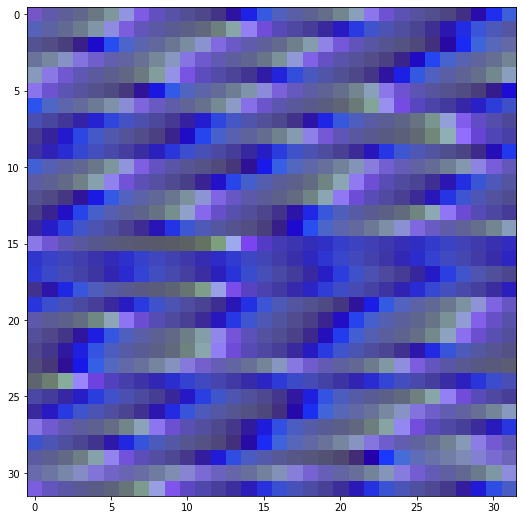

In [64]:
plt.imshow(data[0])

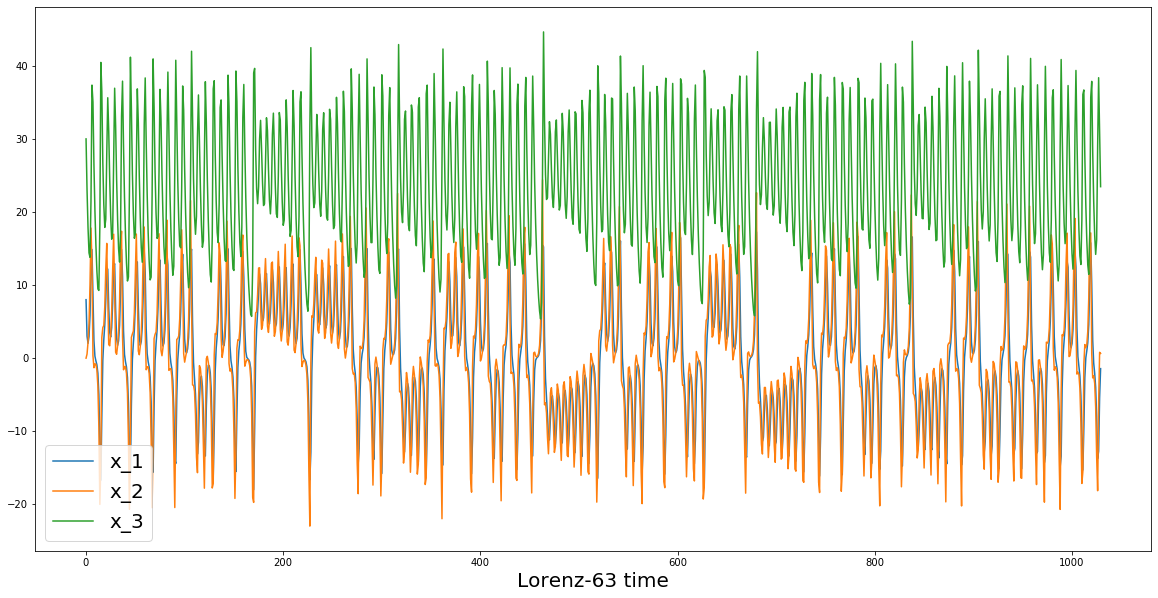

In [65]:
# time series representation
figure(figsize=(20,10))
plot(x)
xlabel('Lorenz-63 time', size=20)
legend(['x_1','x_2','x_3'], prop={'size': 20})